<a href="https://colab.research.google.com/github/rash-Rifat/Basic-data-analysis-by-rashrifat/blob/main/Soyabean_data_analysis(PLSDA_and_PLSregression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
import io

# Upload CSV file
uploaded = files.upload()

Saving Data A.csv to Data A.csv
Saving Data B.csv to Data B.csv


In [ ]:
# Read them
data_a = pd.read_csv(io.BytesIO(uploaded['Data A.csv']))
data_b = pd.read_csv(io.BytesIO(uploaded['Data B.csv']))

# Preview them
print("Data A preview (Discriminant Analysis):")
display(data_a.head())

print("Data B preview (Quantitative Analysis):")
display(data_b.head())


Data A preview (Discriminant Analysis):


,Primary,4000,3999,3998,3997,3996,3995,3994,3993,3992,...,408,407,406,405,404,403,402,401,400,Class
0,OS_PA_2.5%_1_1,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,...,0.0022,0.0021,0.0019,0.0017,0.0015,0.0012,0.0010,0.0008,0.0006,AS
1,OS_P_A5%_1_1,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,...,0.0032,0.0030,0.0026,0.0023,0.0020,0.0017,0.0014,0.0011,0.0004,AS
2,OS_P_A10%_1_1,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0022,0.0020,0.0017,0.0013,0.0010,0.0007,0.0006,0.0006,0.0007,AS
3,OS_P_A15%_1_1,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,...,0.0024,0.0021,0.0018,0.0014,0.0011,0.0009,0.0008,0.0007,0.0005,AS
4,OS_P_A20%_1_1,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,...,0.0016,0.0015,0.0014,0.0012,0.0011,0.0010,0.0008,0.0007,0.0006,AS


Data B preview (Quantitative Analysis):


,Primary,Unnamed: 1,4000,3999,3998,3997,3996,3995,3994,3993,...,408,407,406,405,404,403,402,401,400,Conc
0,OS_PA_2.5%_1_1,NaN,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,...,0.0022,0.0021,0.0019,0.0017,0.0015,0.0012,0.0010,0.0008,0.0006,2.5
1,OS_P_A5%_1_1,NaN,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,...,0.0032,0.0030,0.0026,0.0023,0.0020,0.0017,0.0014,0.0011,0.0004,5.0
2,OS_P_A10%_1_1,NaN,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0022,0.0020,0.0017,0.0013,0.0010,0.0007,0.0006,0.0006,0.0007,10.0
3,OS_P_A15%_1_1,NaN,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,...,0.0024,0.0021,0.0018,0.0014,0.0011,0.0009,0.0008,0.0007,0.0005,15.0
4,OS_P_A20%_1_1,NaN,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,...,0.0016,0.0015,0.0014,0.0012,0.0011,0.0010,0.0008,0.0007,0.0006,20.0


PLS da model

In [ ]:
#PLSDA
# === EXTRACT FEATURES & TARGET ===
# Assuming:
# Column 0 = ID
# Columns 1:-1 = features (4000 to 400)
# Column -1 = Class (AS/PS)

X_a = data_a.iloc[:, 1:-1].values   # features
y_a = data_a.iloc[:, -1].values     # class labels (AS / PS)

# === ENCODE TARGET CLASSES ===
le = LabelEncoder()
y_a_encoded = le.fit_transform(y_a)

In [ ]:
#PLSDA
# === TRAIN-TEST SPLIT ===
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a_encoded, test_size=0.2, random_state=42, stratify=y_a_encoded)

# === PREVIEW SHAPES ===
print("X_train shape:", X_train_a.shape)
print("y_train shape:", y_train_a.shape)
print("X_test shape:", X_test_a.shape)
print("y_test shape:", y_test_a.shape)

# === PREVIEW FIRST FEW RECORDS ===
print("\nFirst 5 training samples (features):")
print(pd.DataFrame(X_train_a[:5]))

print("\nFirst 5 training labels:")
print(y_train_a[:5])

print("\nFirst 5 testing samples (features):")
print(pd.DataFrame(X_test_a[:5]))

print("\nFirst 5 testing labels:")
print(y_test_a[:5])

# === CHECK CLASS DISTRIBUTION ===
print("\nClass distribution in training data:")
unique_train, counts_train = np.unique(y_train_a, return_counts=True)
print(dict(zip(le.inverse_transform(unique_train), counts_train)))

print("\nClass distribution in testing data:")
unique_test, counts_test = np.unique(y_test_a, return_counts=True)
print(dict(zip(le.inverse_transform(unique_test), counts_test)))


X_train shape: (28, 3601)
y_train shape: (28,)
X_test shape: (7, 3601)
y_test shape: (7,)

First 5 training samples (features):
     0       1       2       3       4       5       6       7       8     \
0  0.0003  0.0003  0.0003  0.0003  0.0003  0.0003  0.0003  0.0003  0.0003   
1  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006   
2  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010   
3  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009   
4  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008   

     9     ...    3591    3592    3593    3594    3595    3596    3597  \
0  0.0003  ...  0.0012  0.0010  0.0009  0.0009  0.0009  0.0009  0.0008   
1  0.0006  ...  0.0016  0.0013  0.0010  0.0006  0.0004  0.0001  0.0001   
2  0.0010  ...  0.0014  0.0014  0.0014  0.0013  0.0012  0.0011  0.0010   
3  0.0009  ...  0.0011  0.0012  0.0011  0.0010  0.0009  0.0007  0.0005   
4  0.0008  ...  0.0024  0.0022  0.0020 

In [ ]:
# === SCALE FEATURES ===
scaler = StandardScaler()
X_train_a_scaled = scaler.fit_transform(X_train_a)
X_test_a_scaled = scaler.transform(X_test_a)


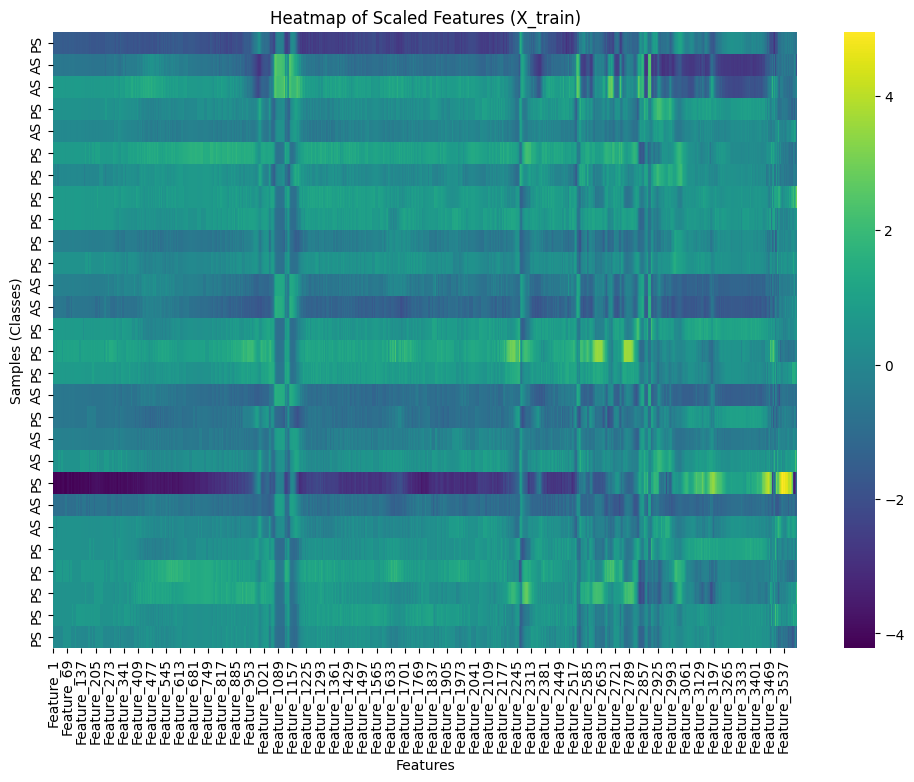

In [ ]:
# plot Heatmap of the Scaled Features (X_train_a_scaled)
# Convert X_train to DataFrame for visualization
X_train_df = pd.DataFrame(
    X_train_a_scaled,
    index=le.inverse_transform(y_train_a),  # Class labels as index
    columns=[f'Feature_{i+1}' for i in range(X_train_a_scaled.shape[1])]
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_df, cmap='viridis', cbar=True)
plt.title('Heatmap of Scaled Features (X_train)')
plt.xlabel('Features')
plt.ylabel('Samples (Classes)')
plt.show()

In [ ]:
# === PLS-DA MODEL ===
pls_da = PLSRegression(n_components=2)
pls_da.fit(X_train_a_scaled, y_train_a)

# === PREDICT & EVALUATE ===
y_pred_prob = pls_da.predict(X_test_a_scaled)
y_pred_class = (y_pred_prob > 0.5).astype(int).ravel()

print("PLS-DA Accuracy:", accuracy_score(y_test_a, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_a, y_pred_class))
print("Classification Report:\n", classification_report(y_test_a, y_pred_class))

PLS-DA Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



<ipython-input-25-7076da0455d9>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p * (s.T @ weight) / total_s)


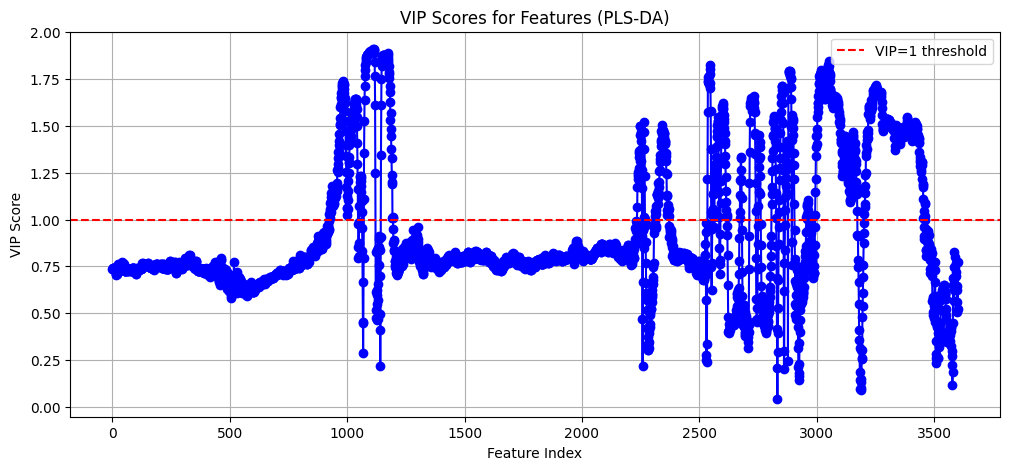

Important feature indices (VIP > 1): [ 924  925  926  927  928  929  930  931  932  933  934  935  936  937
  938  939  940  941  942  943  944  945  946  947  948  949  950  951
  952  953  954  955  956  957  958  959  960  961  962  963  964  965
  966  967  968  969  970  971  972  973  974  975  976  977  978  979
  980  981  982  983  984  985  986  987  988  989  990  991  992  993
  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007
 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021
 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035
 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1071 1072 1073 1074 1075 1076
 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090
 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104
 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118
 1119 1120 1144 1145 1146 1147 1148 1149

In [ ]:
# === VIP SCORE FUNCTION ===
def calculate_vip(pls_model, X):
    t = pls_model.x_scores_
    w = pls_model.x_weights_
    q = pls_model.y_loadings_

    p, h = w.shape
    vips = np.zeros((p,))

    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j]))**2 for j in range(h)])
        vips[i] = np.sqrt(p * (s.T @ weight) / total_s)

    return vips

vip_scores = calculate_vip(pls_da, X_train_a_scaled)

# === PLOT VIP SCORES ===
plt.figure(figsize=(12, 5))
plt.plot(vip_scores, marker='o', linestyle='-', color='b')
plt.title('VIP Scores for Features (PLS-DA)')
plt.xlabel('Feature Index')
plt.ylabel('VIP Score')
plt.axhline(y=1, color='r', linestyle='--', label='VIP=1 threshold')
plt.legend()
plt.grid(True)
plt.show()

# === IMPORTANT FEATURES (VIP > 1) ===
important_features = np.where(vip_scores > 1)[0]
print(f'Important feature indices (VIP > 1): {important_features}')

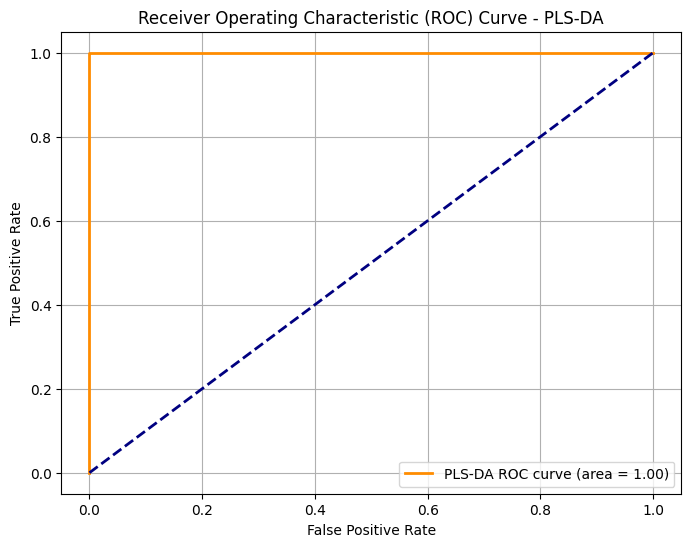

In [ ]:
# Get False Positive Rate, True Positive Rate
#plot ROC
fpr, tpr, thresholds = roc_curve(y_test_a, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'PLS-DA ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - PLS-DA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

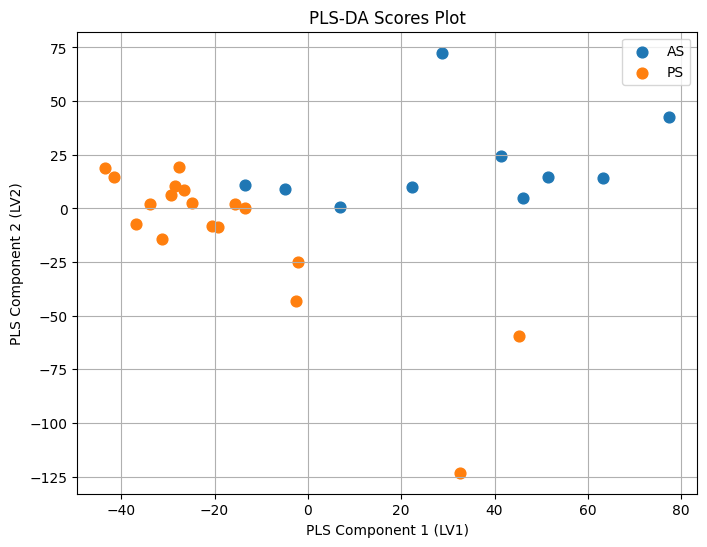

In [ ]:
# Get scores from PLS-DA model
scores = pls_da.x_scores_

# Plot the scores on first two components
plt.figure(figsize=(8, 6))
for label in np.unique(y_train_a):
    plt.scatter(
        scores[y_train_a == label, 0],
        scores[y_train_a == label, 1],
        label=le.inverse_transform([label])[0],
        s=60
    )

plt.xlabel('PLS Component 1 (LV1)')
plt.ylabel('PLS Component 2 (LV2)')
plt.title('PLS-DA Scores Plot')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-21-ff7bbc9ee9ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Class', y='LV1', data=scores_df, palette='Set2', size=6)


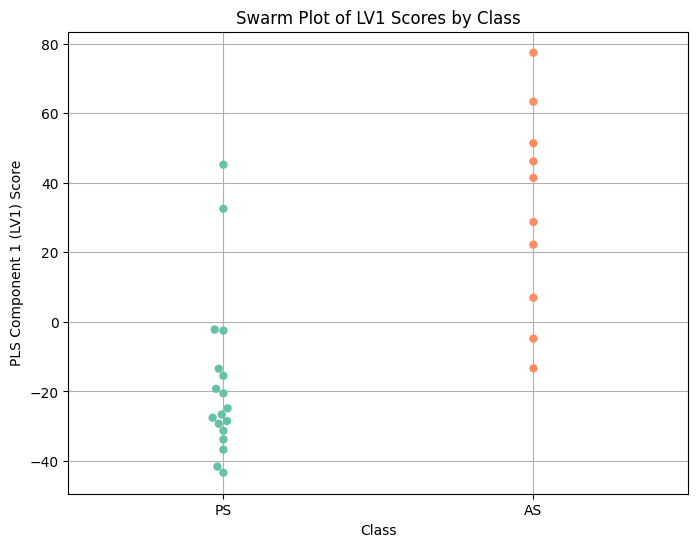

<ipython-input-21-ff7bbc9ee9ca>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Class', y='LV2', data=scores_df, palette='Set2', size=6)


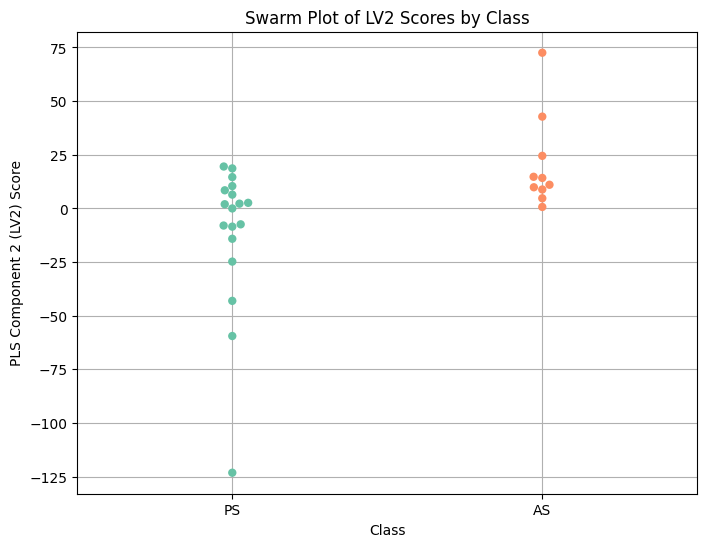

In [ ]:
#Swarm Plot
# Convert latent variable scores and labels to DataFrame
scores_df = pd.DataFrame({
    'LV1': scores[:, 0],
    'LV2': scores[:, 1],
    'Class': le.inverse_transform(y_train_a)
})

# Swarm plot for LV1
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Class', y='LV1', data=scores_df, palette='Set2', size=6)
plt.title('Swarm Plot of LV1 Scores by Class')
plt.xlabel('Class')
plt.ylabel('PLS Component 1 (LV1) Score')
plt.grid(True)
plt.show()

# Swarm plot for LV2 (optional)
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Class', y='LV2', data=scores_df, palette='Set2', size=6)
plt.title('Swarm Plot of LV2 Scores by Class')
plt.xlabel('Class')
plt.ylabel('PLS Component 2 (LV2) Score')
plt.grid(True)
plt.show()

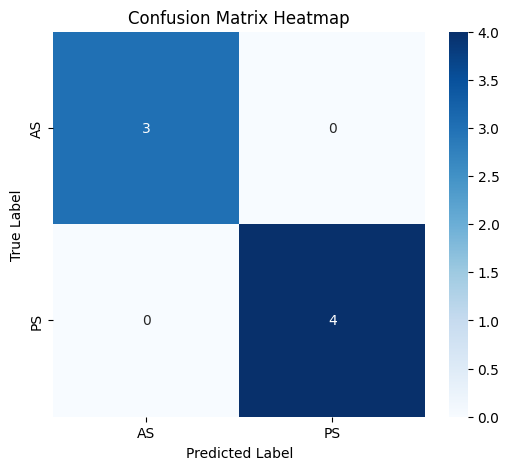

In [ ]:
# Heatmap of the Confusion Matrix
# Get confusion matrix
cm = confusion_matrix(y_test_a, y_pred_class)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

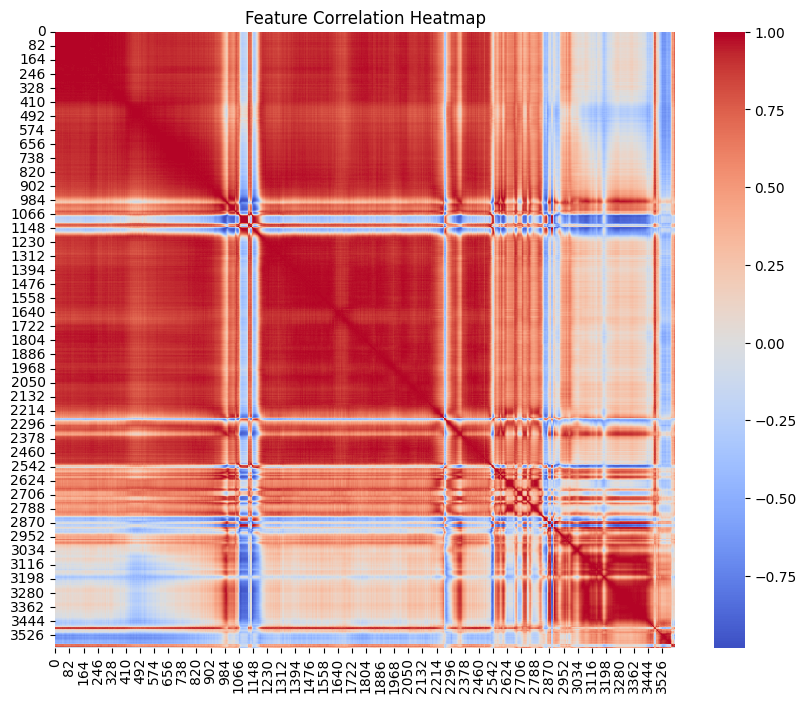

In [ ]:
# Correlation matrix on scaled features
corr_matrix = pd.DataFrame(X_train_a_scaled).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

PLS Regression model (Partial Least Squares Regression) for your quantitative analysis, using your "Data B" file.

In [ ]:
# Assume the first column is an ID and the last column is your target (adjust if necessary)
X_b = data_b.iloc[:, 2:-1]  # features (from 3rd to second last column)
y_b = data_b.iloc[:, -1]    # target (last column)

In [ ]:
# === TRAIN-TEST SPLIT ===
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y_b, test_size=0.2, random_state=42
)

# === PREVIEW SHAPES ===
print("X_train shape:", X_train_b.shape)
print("y_train shape:", y_train_b.shape)
print("X_test shape:", X_test_b.shape)
print("y_test shape:", y_test_b.shape)

# === PREVIEW FIRST FEW RECORDS ===
print("\nFirst 5 training samples (features):")
print(pd.DataFrame(X_train_b[:5]))

print("\nFirst 5 training labels:")
print(y_train_b[:5].values)

print("\nFirst 5 testing samples (features):")
print(pd.DataFrame(X_test_b[:5]))

print("\nFirst 5 testing labels:")
print(y_test_b[:5].values)

X_train shape: (10, 3601)
y_train shape: (10,)
X_test shape: (3, 3601)
y_test shape: (3,)

First 5 training samples (features):
      4000    3999    3998    3997    3996    3995    3994    3993    3992  \
8   0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006   
5   0.0005  0.0005  0.0005  0.0005  0.0005  0.0005  0.0005  0.0005  0.0005   
2   0.0008  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008  0.0008   
1   0.0009  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009  0.0009   
12  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006  0.0006   

      3991  ...     409     408     407     406     405     404     403  \
8   0.0006  ...  0.0010  0.0009  0.0007  0.0004  0.0004  0.0004  0.0006   
5   0.0005  ...  0.0006  0.0006  0.0006  0.0008  0.0008  0.0007  0.0004   
2   0.0008  ...  0.0024  0.0022  0.0020  0.0017  0.0013  0.0010  0.0007   
1   0.0009  ...  0.0033  0.0032  0.0030  0.0026  0.0023  0.0020  0.0017   
12  0.0006  ...  0.0016  0.0

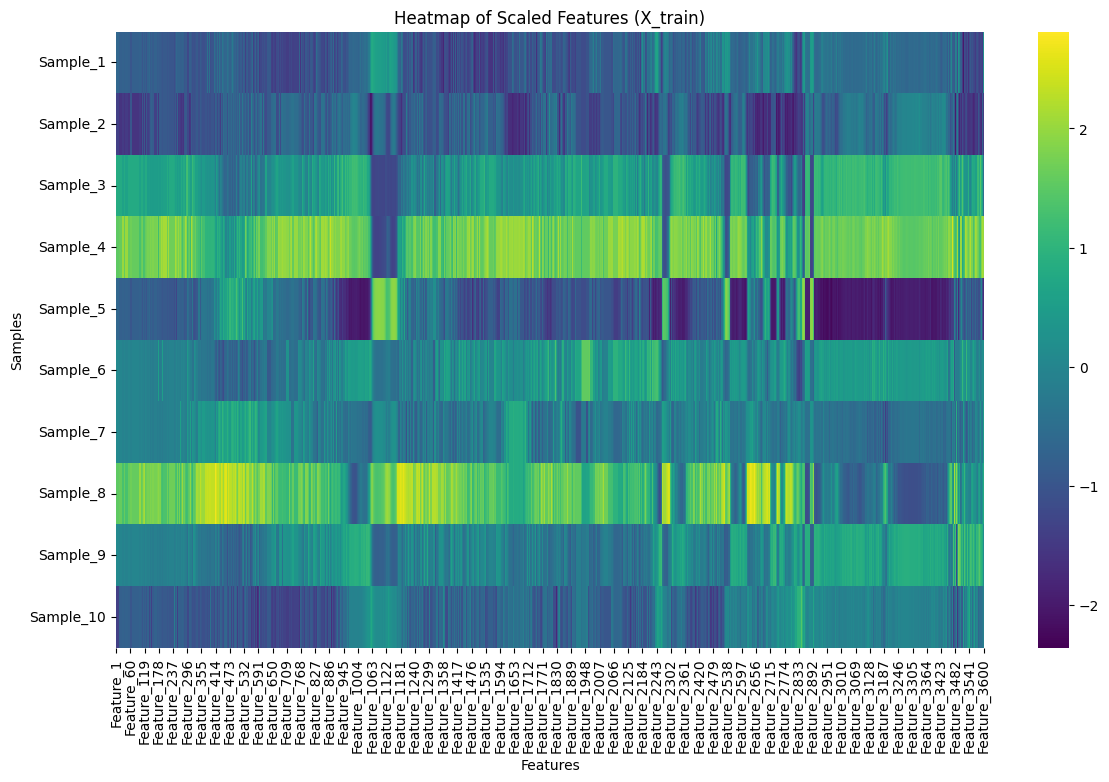

In [ ]:
# === SCALE FEATURES ===
scaler_b = StandardScaler()

X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# === HEATMAP OF THE SCALED FEATURES ===
X_train_b_scaled_df = pd.DataFrame(
    X_train_b_scaled,
    index=[f'Sample_{i+1}' for i in range(X_train_b_scaled.shape[0])],
    columns=[f'Feature_{i+1}' for i in range(X_train_b_scaled.shape[1])]
)

plt.figure(figsize=(14, 8))
sns.heatmap(X_train_b_scaled_df, cmap='viridis', cbar=True)
plt.title('Heatmap of Scaled Features (X_train)')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

In [ ]:
# === BUILD PLS REGRESSION MODEL ===
pls_b = PLSRegression(n_components=2)  # You can tune this
pls_b.fit(X_train_b_scaled, y_train_b)

# === PREDICTIONS ===
y_train_pred_b = pls_b.predict(X_train_b_scaled).ravel()
y_test_pred_b = pls_b.predict(X_test_b_scaled).ravel()

# === TRAIN METRICS ===
rmse_train_b = np.sqrt(mean_squared_error(y_train_b, y_train_pred_b))
r2_train_b = r2_score(y_train_b, y_train_pred_b)

# === TEST METRICS ===
rmse_test_b = np.sqrt(mean_squared_error(y_test_b, y_test_pred_b))
r2_test_b = r2_score(y_test_b, y_test_pred_b)

print(f'TRAIN RMSE: {rmse_train_b:.4f}, R²: {r2_train_b:.4f}')
print(f'TEST  RMSE: {rmse_test_b:.4f}, R²: {r2_test_b:.4f}')

TRAIN RMSE: 1.7528, R²: 0.9890
TEST  RMSE: 3.6298, R²: 0.9746


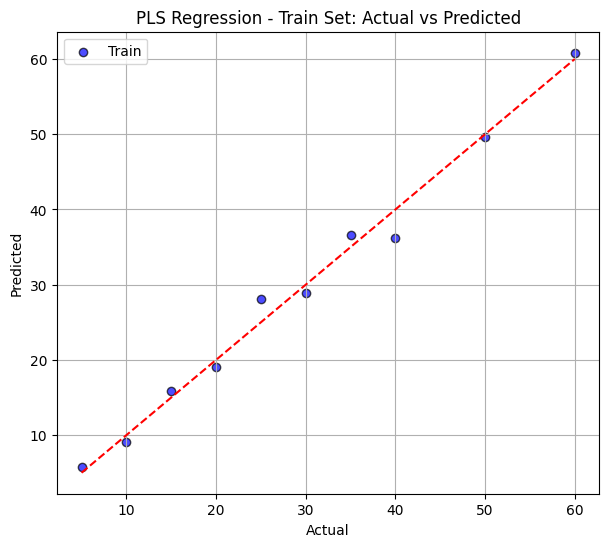

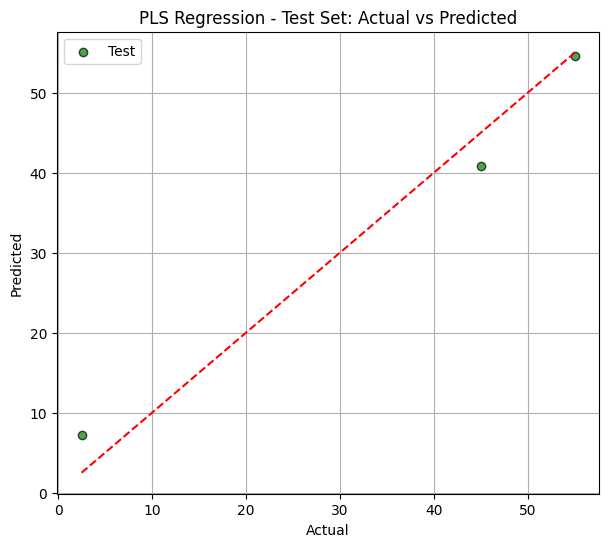

In [ ]:
# === ACTUAL VS PREDICTED TRAIN ===
plt.figure(figsize=(7, 6))
plt.scatter(y_train_b, y_train_pred_b, color='blue', edgecolor='k', alpha=0.7, label='Train')
plt.plot([y_train_b.min(), y_train_b.max()], [y_train_b.min(), y_train_b.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('PLS Regression - Train Set: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# === ACTUAL VS PREDICTED TEST ===
plt.figure(figsize=(7, 6))
plt.scatter(y_test_b, y_test_pred_b, color='green', edgecolor='k', alpha=0.7, label='Test')
plt.plot([y_test_b.min(), y_test_b.max()], [y_test_b.min(), y_test_b.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('PLS Regression - Test Set: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-42-87af8d9ea1aa>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p * (s.T @ weight) / total_s)


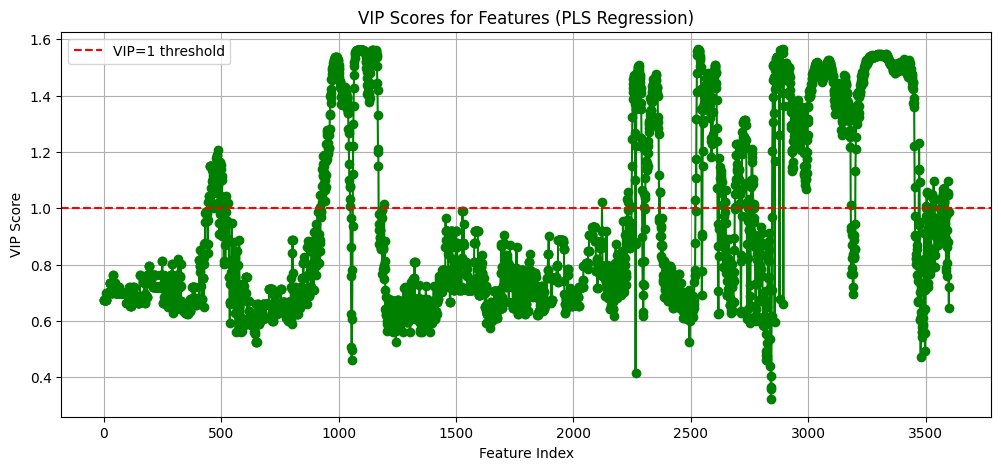


Important feature indices (VIP > 1):
[ 446  447  448 ... 3594 3595 3596]


In [ ]:
# === VIP SCORE FUNCTION (works for PLS Regression) ===
def calculate_vip(pls_b, X):
    t = pls_b.x_scores_
    w = pls_b.x_weights_
    q = pls_b.y_loadings_

    p, h = w.shape
    vips = np.zeros((p,))

    # Sum of squares explained by each component
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    # Calculate VIP for each feature
    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j]))**2 for j in range(h)])
        vips[i] = np.sqrt(p * (s.T @ weight) / total_s)

    return vips

# === CALCULATE VIP SCORES FOR PLS ===
vip_scores_pls = calculate_vip(pls_b=pls_b, X=X_train_b_scaled)

# === PLOT VIP SCORES ===
plt.figure(figsize=(12, 5))
plt.plot(vip_scores_pls, marker='o', linestyle='-', color='g')
plt.title('VIP Scores for Features (PLS Regression)')
plt.xlabel('Feature Index')
plt.ylabel('VIP Score')
plt.axhline(y=1, color='r', linestyle='--', label='VIP=1 threshold')
plt.legend()
plt.grid(True)
plt.show()

# === IMPORTANT FEATURES (VIP > 1) ===
important_features_indices_pls = np.where(vip_scores_pls > 1)[0]
print(f'\nImportant feature indices (VIP > 1):\n{important_features_indices_pls}')

# OPTIONAL: If you have feature names
# feature_names_b = X_b.columns  # Uncomment if X_b is a DataFrame
# important_feature_names_b = feature_names_b[important_features_indices_pls]
# print(f'\nImportant feature names (VIP > 1):\n{important_feature_names_b.tolist()}')
